In [2]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.3MB/s 
     |████████████████████████████████| 501kB 44.9MB/s 
     |████████████████████████████████| 3.1MB 48.6MB/s 


In [18]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() ##
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
K = len(set(y_train))
K

10

In [0]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 34s 684us/sample - loss: 1.5090 - accuracy: 0.4508 - val_loss: 1.1928 - val_accuracy: 0.5688
Epoch 2/15
50000/50000 [==============================] - 34s 678us/sample - loss: 1.1675 - accuracy: 0.5842 - val_loss: 1.0815 - val_accuracy: 0.6214
Epoch 3/15
50000/50000 [==============================] - 33s 658us/sample - loss: 1.0093 - accuracy: 0.6414 - val_loss: 0.9592 - val_accuracy: 0.6598
Epoch 4/15
50000/50000 [==============================] - 33s 663us/sample - loss: 0.9025 - accuracy: 0.6815 - val_loss: 0.9841 - val_accuracy: 0.6547
Epoch 5/15
50000/50000 [==============================] - 33s 656us/sample - loss: 0.8057 - accuracy: 0.7144 - val_loss: 0.8828 - val_accuracy: 0.6935
Epoch 6/15
50000/50000 [==============================] - 33s 651us/sample - loss: 0.7284 - accuracy:

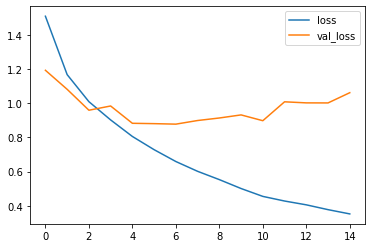

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

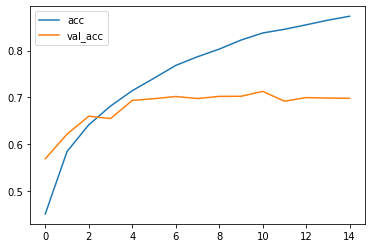

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[749  21  45  18  22   5   4  11  86  39]
 [ 17 846   9   7   2   0   2   6  40  71]
 [ 80  13 641  49  65  62  24  35  17  14]
 [ 31  13 101 478  58 183  39  51  24  22]
 [ 29   6 102  62 616  55  30  81  14   5]
 [ 23   7  74 177  43 580  15  55  12  14]
 [ 16  16  59  92  56  26 701   8  11  15]
 [ 14   6  36  26  59  49   5 771   8  26]
 [ 74  27  19   7   7   3   2   5 834  22]
 [ 37 107  10  13   4   9   4  13  38 765]]


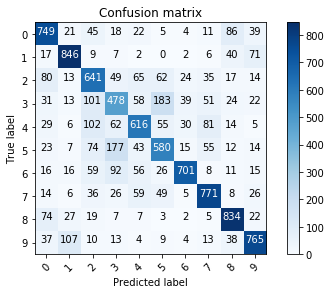

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

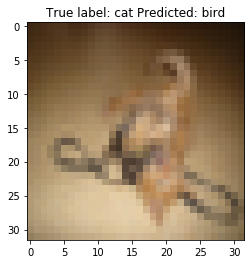

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));